In [4]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [5]:
# Liste der Variablen ausgeben
%whos   

No variables match your requested type.


In [6]:
%matplotlib notebook

# Laden der verwendeten Bibliotheken
from PIL import Image
import   numpy  as np               
import   scipy 
import   matplotlib                 # https://matplotlib.org/3.1.1/tutorials/index.html
import   matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html
import   sklearn 
import   skimage
from     skimage import data
import   time
from     scipy import signal

In [7]:
# Bild laden mit PIL
img = Image.open("../shaft.bmp")
#img = Image.open("../circle.bmp")
#img = Image.open("../boat512.bmp")
#img = Image.open("../tasse1.bmp")

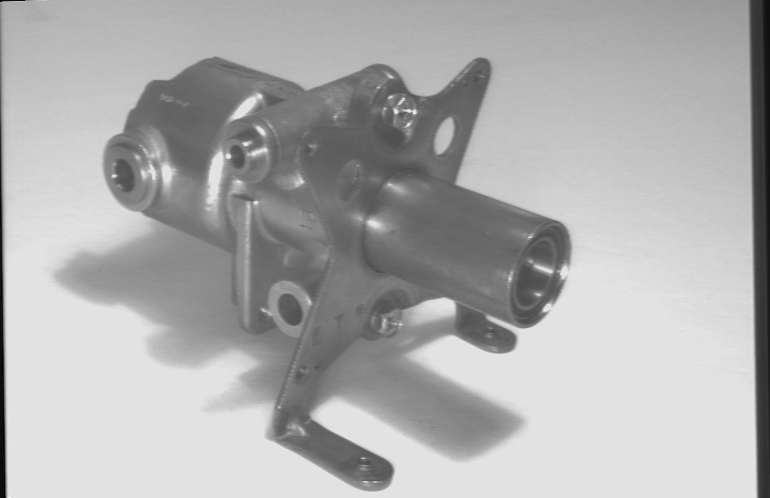

In [8]:
# PIL-Image darstellen
img

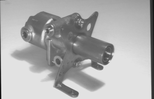

In [9]:
# Beispiel:  Verkleinerung von Bildern
size = (int(img.width/5), int(img.height/5)) # Bildgröße bestimmen und in einem Tupel zusammenfassen
imgsmall = img.resize(size, resample=1)      # Nearest-Neighbour (0), Bilinear (1), Bicubic (2), Lanczos (3)
imgsmall

In [10]:
# Informationen über PIL-Image
print('format =', img.format)
print('info   =', img.info)
print()
print('size   =', img.size,)
print('mode   =', img.mode)  # 'L' = 8-bit-unsigned

format = BMP
info   = {'dpi': (72, 72), 'compression': 0}

size   = (770, 498)
mode   = L


In [11]:
# PIL-Image in ein numpy-Array umwandeln TODO: HIER IST DAS KLEINE NOCH BENUTZT!
#img2 = np.array(imgsmall)
img2 = np.array(img)
test1 = img2[0][0]
test2 = img2[1][0]
test3 = img2[0][1]
print(test1,test2,test3)
img2

13 13 13


array([[ 13,  13,  13, ...,  17,  16,  17],
       [ 13,  13, 110, ...,  18,  16,  18],
       [153, 154, 163, ...,  16,  16,  16],
       ...,
       [ 13,  13,  13, ...,  46,  50,  45],
       [ 13,  13,  13, ...,  46,  50,  44],
       [ 13,  13,  13, ...,  47,  51,  45]], dtype=uint8)

In [12]:
#TODO: HIER IST IMGSMALL NICHT DAS NORMALE IMG
img_width = imgsmall.size[1]
img_height = imgsmall.size[0]
print('X   = ', img_width, '    Y   = ', img_height)
print('Iteration also von 0 bis xmax=', img_width-1 , '    und   ymax=',img_height-1)

X   =  99     Y   =  154
Iteration also von 0 bis xmax= 98     und   ymax= 153


In [14]:
def MyMedian_ARRAYSORT(src, maskX, maskY):
    return median_sorting(src, maskX, maskY, 1)

In [15]:
def MyMedian_HIST(src, maskX, maskY):
    return median_sorting(src, maskX, maskY, 0)

In [16]:
def median_sorting(src, maskX, maskY, mode):
    # Zielbilder anlegen
    dst = np.copy(src)
    # Größe des Quellbildes bestimmen
    ysize = src.shape[0]
    xsize = src.shape[1]

    # Pruefen ob Maske ungerade
    if(maskX % 2 == 0):
        maskX += 1
        
    if(maskY % 2 == 0):
        maskY += 1
    
    #für arraycpy
    x_begin=0
    y_begin=0
    x_end=0
    y_end=0
    maskbound_x = int(maskX/2)
    maskbound_y = int(maskY/2)
    
    
    doit=1
    
    for y in range(0,ysize):
        for x in range(0,xsize):
            #ab hier 1 bildpunkt
            
            #check if out of bounds: it takes the values 
            #indexing from 0 to size-1, so no out of bounds will happen
            if(x-maskbound_x < 0):
                x_begin = 0
            else:
                x_begin = x-maskbound_x
                
            if(y-maskbound_y < 0):
                y_begin = 0
            else:
                y_begin = y-maskbound_y
                
            if(x+maskbound_x > xsize-1):
                x_end = xsize-1
            else:
                x_end = x+maskbound_x
                
            if(y+maskbound_y > ysize-1):
                y_end = ysize-1
            else:
                y_end = y+maskbound_y
                
            #cut array data
            #print("arrayzuweisung:",x_end-x_begin+1,y_end-y_begin+1,"werte:",x_begin,y_begin,x_end,y_end)
            median_array = np.zeros((y_end-y_begin+1, x_end-x_begin+1))
            for b in range(y_begin,y_end+1): #+1 because python handles forloop as < ??
                for a in range(x_begin,x_end+1):
                    median_array[b-y_begin][a-x_begin] = dst[b][a]
                    
                    
            #IF SORTING MODE
            if(mode == 1):
                sorted_array = np.sort(median_array, axis=None)
                dst[y][x] = sorted_array[(int)((np.size(sorted_array)/2))]
            #ELSE WITH HISTOGRAM
            else:
                histarr = np.histogram(median_array.flatten())
                häufigkeiten = histarr[0]
                werte = histarr[1]
                count = 0
                index = 0
                while(count< (((y_end-y_begin+1) * (x_end-x_begin+1) +1)/2) ):
                    count += häufigkeiten[index]
                    index += 1
                dst[y][x]=werte[index]

      
    return dst

498 770
Runtime   = 3.995s


<IPython.core.display.Javascript object>


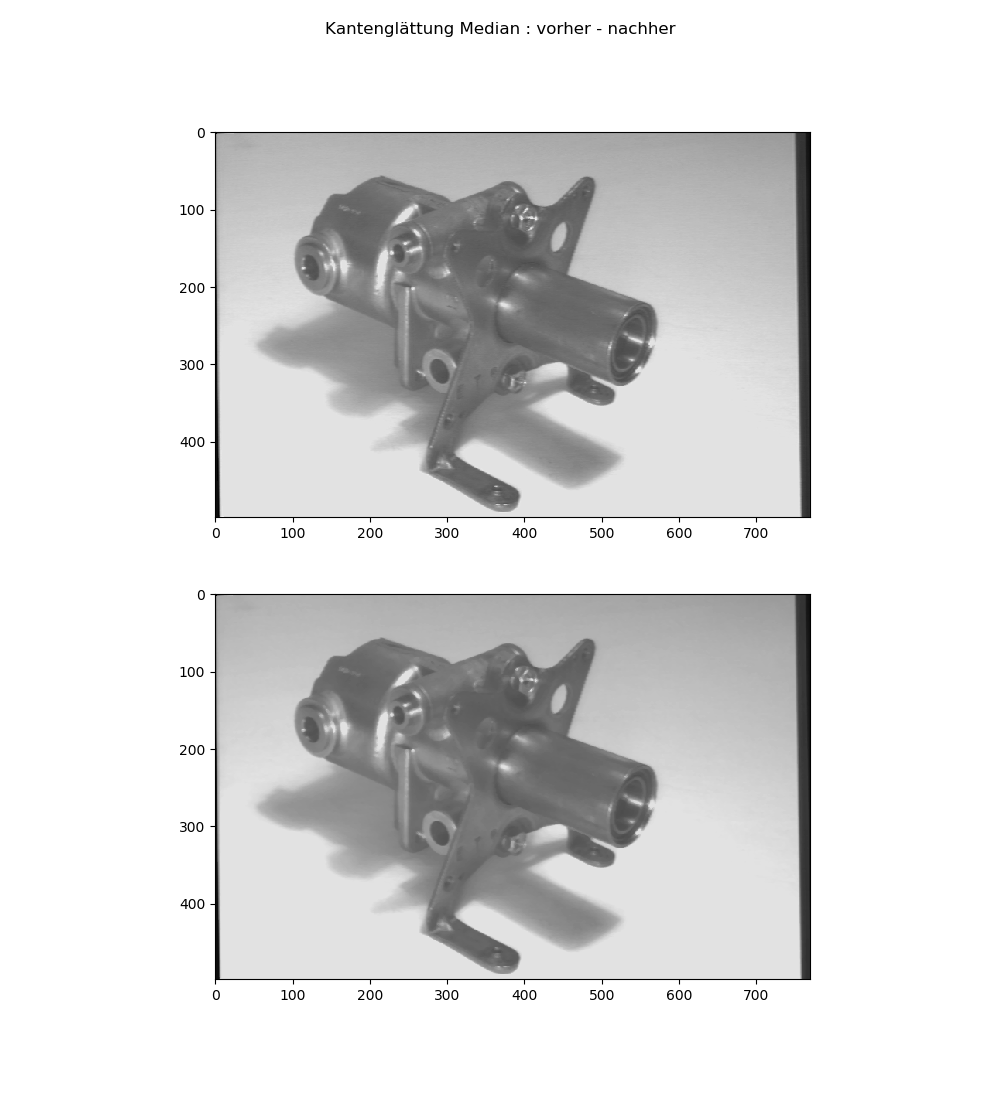

min/max = 13 227
shape   = (498, 770)
dtype   = int32


In [19]:
start = time.time()

# in höheren Datentyp umwandeln  (uint8 --> int), damit Ergebnisse nicht beschnitten werden !

srcpic  = np.copy(img2)      # eine echte Kopie anlegen
srcpic  = srcpic.astype(int) # und in den Datentyp int umwandeln

#Mask
xbound = 3
ybound = 3

#Modi
pic = MyMedian_ARRAYSORT(srcpic,xbound,ybound)
#pic = MyMedian_HIST(srcpic,xbound,ybound)

ende   = time.time()
print('Runtime   = {:5.3f}s'.format(ende-start))



plt.figure(figsize = (10,11))

plt.subplot(211)
plt.imshow(srcpic, cmap='gray', vmin=0, vmax=255)
plt.subplot(212)
plt.imshow(pic, cmap='gray', vmin=0, vmax=255)
plt.suptitle('Kantenglättung Median : vorher - nachher')
plt.show()

# Informationen zum Bild
print('min/max =', pic.min(), pic.max())
print('shape   =', pic.shape)
print('dtype   =', pic.dtype)

In [17]:
#sorting speeds:
#Bei x10 y10 ohne sorting (computingtime): 25.445s

#Bei x5 y5 histogram: 41????

#bei x10 y10 histogram: 62????
#Bei x10 y10 arraysort: 28.325s

#bei x20 y20 histogram: 131???
#bei x20 y20 sort: 96

# 50 50 histo: 540
# 50 50 sort: 572